> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 2

**Handin in Peergrade**: *Wednesday*, March 13, 2019, 23:59<br>
**Peergrading deadline**: *Wednesday*, March 20, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, March 23, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 4

In [1]:
import numpy as np
import re, os

def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("./data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\|.+=", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]

def get_chars():
    chars = []
    for faction in ["heroes","villains", "ambiguous"]:
        faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
        for char in faction_chars:
            if char not in chars:
                chars.append(char)
    return chars

all_chars = get_chars()

def get_teams():
    all_alliances = []
    all_chars = get_chars()
    for char in all_chars:
        tmp_alliances = get_alliances(char)
        for alliance in tmp_alliances:
            if alliance not in all_alliances:
                all_alliances.append(alliance)
    all_alliances.sort()
    return all_alliances

all_teams = get_teams()

def get_vector(char):
    vector = [0] * 622
    this_teams = get_alliances(char)
    for idx, team in enumerate(all_teams):
        if team in this_teams:
            vector[idx] = 1
    return vector

def get_feature():
    chars = []
    for faction in ["heroes","villains"]:
        faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
        for char in faction_chars:
            if char not in chars:
                chars.append(char)
    matrix = []
    for char in chars:
        tmp = get_vector(char)
        matrix.append(tmp)
    feature = np.array(matrix)
    return feature

my_feature = get_feature()

In [2]:
def get_target():
    target = []
    for idx, faction in enumerate(["heroes","villains"]):
        faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
        for char in faction_chars:
            target.append(idx)
    return target

# heroes = 0
# villains = 1 (majority)
my_target = get_target()

In [3]:
print(my_feature)
print(my_target)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [55]:
from sklearn.naive_bayes import BernoulliNB
import sklearn.metrics as sk
tmp_model = BernoulliNB()

tmp_model.fit(my_feature, my_target)
my_prediction = tmp_model.predict(my_feature)
print(sk.precision_score(my_prediction, my_target))

0.979


> **Ex. 4.3.2**: Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. It's important that you comment on the result.

In [56]:
from sklearn.model_selection import cross_validate
model = BernoulliNB()
scores = cross_validate(model, my_feature, my_target, cv=10)
test_scores = scores["test_score"]
train_scores = scores["train_score"]

print("test scores:", test_scores)
print("train scores: ", train_scores)

test scores: [0.80232558 0.78488372 0.80232558 0.86627907 0.80232558 0.80813953
 0.81395349 0.80701754 0.81871345 0.8128655 ]
train scores:  [0.83754045 0.8420712  0.83883495 0.83559871 0.8407767  0.83754045
 0.8407767  0.83829237 0.83570505 0.84152652]


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


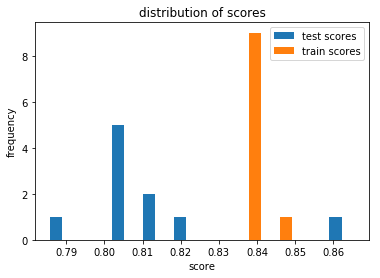

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.hist([test_scores, train_scores], label=['test scores', 'train scores'])
plt.title("distribution of scores")
plt.xlabel("score")
plt.ylabel("frequency")
plt.legend(loc='upper right')
plt.show()

Commentary for Ex. 4.3.2: 

The training scores reveal some overfitting, as they are clustered tightly around a small range of values. Meanwhile, the test scores show the model's behavior when it's presented with new data, so they have a wider range of values. The test scores are still pretty accurate; it appears the model is good.

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

In [58]:
def get_ambiguous_rep():
    chars = []
    for faction in ["ambiguous"]:
        faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
        for char in faction_chars:
            if char not in chars:
                chars.append(char)
    matrix = []
    for char in chars:
        tmp = get_vector(char)
        matrix.append(tmp)
    feature = np.array(matrix)
    return feature

amb_feature = get_ambiguous_rep()
print(amb_feature)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [73]:
amb_model = BernoulliNB()
amb_model.fit(my_feature, my_target)
amb_prediction = amb_model.predict_proba(amb_feature)

In [81]:
def get_vill_probs(entries):
    vill_probs = []
    for entry in entries:
        vill_probs.append(entry[1])
    return vill_probs

vill_probs = get_vill_probs(amb_prediction)

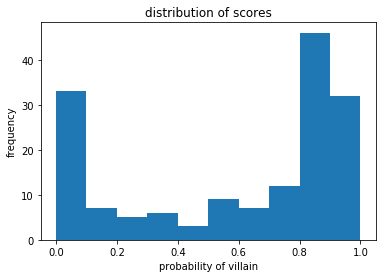

In [82]:
plt.hist(vill_probs)
plt.title("distribution of scores")
plt.xlabel("probability of villain")
plt.ylabel("frequency")
plt.show()

Comments for 4.4.1:

Similar to the unambiguous set of characters, it appears that we are likely to have a majority of villains within the ambiguous characters. Not everyone can play the hero. That being said, there is a significant number of ambiguous characters who (according to our model) belong unequivocally in either category. We know this because the probabilities are heavy at the head and tail.

### Week 5

>**Ex. 5.1.3**: Print the maximum entropy path of a decision tree.
>
>1. Implement the following pseudocode and print the output:<br><br>
>Step 1. Find `team` that gives lowest split entropy for `data`. Print `team`.<br>
>Step 2. Split `data` on `team`, to produce `data0` and `data1`. Print the entropy of each, as well as their weighted avg. entropy.<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.2.3.1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How splits are there? Do you notice anything interesting about the final splits? Why do we choose to stop splitting before `data` get smaller than 5?
>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of the order of splits you just printed (a comment is fine)?

### Week 6

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

> **Ex: 6.2.7**: Let's make a nice plot of the network.
* Color the nodes by class. Try if you can to use blue for heroes, red for villains and yellow(ish) for ambiguous.
* Scale the size of nodes by the square root of their degree.
* Adjust the layout of the figure so it doesn't look too messy (e.g. edge line width, node line width, type of force-layout [I can recommend *neato*, but you have to install graphviz with conda to use it])
* Do you see anything interesting? Get any new ideas for things that can be investigated?

> ***PROTIP THOUGH***: *If you want to make a beautiful plot, I actually made [a tool](https://ulfaslak.com/works/network_styling_with_d3/index.html) for making pretty visualizations of networks. I'd be curious to see the Marvel network visualized in my tool. You can also launch networks into it directly from Python using the `netwulf` package (you can install it with pip). Just follow [this example](https://github.com/benmaier/netwulf). You can download the image and include it in the notebook as a link (which you have to host somewhere).*